# Νευρωνικά Δίκτυα και Ευφυή Υπολογιστικά Συστήματα
## Εργασία 1. Επιβλεπόμενη Μάθηση
Δημήτριος Καλαθάς - el18016 <br>
Δημήτριος Μπακάλης - el18163<br>
Δημήτριος Καλέμης - el18152

#<font color=7284A8>Μέρος 1. UCI dataset (40%)</font>


##Εισαγωγή και επισκόπηση

**Περιγραφή του Dataset**

Το dataset με το οποίο θα δουλέψει η ομάδα μας (ομάδα 91) είναι το [Dermatology Data Set](http://archive.ics.uci.edu/ml/datasets/Dermatology). Σκοπός αυτού του dataset είναι να προσδιορίσει τον τύπο της ερυθηματο-πλακώδους νόσου (Erythemato-Squamous Disease or ESD). Πιο συγκεκριμένα, το σύνολο δεδομένων έχει 366 δείγματα για περιπτώσεις της πάθησης και περιλαμβάνει 34 κλινικά και ιστοπαθολογικά χαρακτηριστικά (attributes) για κάθε δείγμα, όπως ερύθημα, φαγούρα, εξωκυττάρωση και ακράτεια μελανίνης. Τα χαρακτηριστικά αυτά, παίρνουν τιμές από το 0 έως το 3. Το 0 δείχνει πως το χαρακτηριστικό αυτό δεν υπάρχει και το 3 δείχνει πως υπάρχει στο μέγιστο βαθμό, ενώ οι τιμές 1 και 2 είναι ενδιάμεσες καταστάσεις. Εξαίρεση αποτελούν τα χαρακτηριστικά "family history" και "Age". Στο πρώτο, με 1 συμβολίζεται η ύπαρξη κάποιας από τις ESD ασθένειες στον οικογενειακό κύκλο και με 0 η μη ύπαρξη αυτής, ενώ στο δεύτερο αντιστοιχεί η ηλικία του ασθενή. Το σύνολο δεδομένων δεν περιέχει επικεφαλίδες ούτε αρίθμηση γραμμών, οπότε η αντιστοίχιση των labels και των χαρακτηριστικών γίνεται παρακάτω manually. Όπως αναφέρεται και στο documentation του dataset, υπάρχουν 8 απουσιάζουσες τιμές στο χαρακτηριστικό 'Age'. Τα κελιά σε αυτές τις θέσεις έχουν τον χαρακτήρα '?' ο οποίος δηλώνει πως δεν έχουμε τιμή σε αυτή τη θέση. Το ποσοστό missing values επί του συνόλου είναι: $$Π = {8\over 366}\times100 \% = 2,18 \%$$

Ακόμη, υπάρχουν 6 δυνατοί τύποι ερυθηματο-πλακώδους νόσου (ετικέτες κλάσεων) στην 35η στήλη, οι οποίοι αναγράφονται παρακάτω μαζί με τη συχνότητα εμφάνισής τους:

       Class code:   Class:                  Number of instances:    Percentage:
       1             psoriasis			          112                 0.306
       2             seboreic dermatitis             61                 0.166
       3             lichen planus                   72                 0,196
       4             pityriasis rosea                49                 0,133
       5             cronic dermatitis               52                 0,142
       6             pityriasis rubra pilaris        20                 0,054

Παρατηρούμε πως το dataset δεν είναι ισορροπημένο, από τη στιγμή που η ετικέτα 'psoriasis' είναι περίπου 5 φορές συχνότερη από την ετικέτα 'pityriasis rubra pilaris'. Συνεπώς υπάρχει τουλάχιστον μια κλάση, η οποία είναι 1.5 φορά πιο συχνή από κάποια άλλη και άρα το σύνολο δεδομένων δεν είναι ισορροπημένο.

###Imports

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display
import warnings
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import time
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt


warnings.filterwarnings("ignore")

###Read Dataset:

Ανοίγουμε το dataset ως csv με την pandas βιβλιοθήκη και αντικαθιστούμε τον χαρακτήρα '?' που υπάρχει στο column της ηλικίας με np.NaN για να το επεξεργαστούμε στη συνέχεια.

In [ ]:
# Load dataset
df = pd.read_csv("dermatology.data", header=None)
df.replace('?', np.NaN, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


Μετατρέπουμε το dataframe σε np.array και παίρνουμε τα features και τα labels αντίστοιχα.

In [ ]:
# convert dataframe to np.array
data = np.array(df)
features = data[:, :-1]
labels = data[:, -1]

Παίρνουμε το πλήθος των δειγμάτων ανά κλάση και έπειτα τη συχνότητα εμφάνισής τους στο dataset:

In [ ]:
labels = labels.astype(int)
print("frequencies:", np.bincount(labels)[1:])

freq = []
for i in range(1,7):
  freq.append(np.bincount(labels)[i]/labels.shape)
print("f1 {}, f2 {}, f3 {}, f4 {}, f5 {}, f6 {}".format(freq[0], freq[1], freq[2], freq[3], freq[4], freq[5]))

frequencies: [112  61  72  49  52  20]
f1 [0.30601093], f2 [0.16666667], f3 [0.19672131], f4 [0.13387978], f5 [0.1420765], f6 [0.05464481]


##Data split and preprocessing:

Διαχωρίζουμε το dataset σε train (70%) και test (30%) sets ώστε να πραγματοποιηθεί η εκπαίδευση των ταξινομητών. <br>
Όπως αναφέρεται και παραπάνω, υπάρχουν απουσιάζουσες τιμές στο σύνολο δεδομένων, συνεπώς θα πρέπει να επιλυθεί το ζήτημα αυτό για το training set (στο test set δε μπορούμε να επέμβουμε επειδή θα χρησιμοποιηθεί για τη γενίκευση του μοντέλου). Θα μπορούσαμε να διαγράψουμε τις γραμμές που εμπεριέχουν μια άδεια τιμή (εδώ συμβολίζεται με '?'), καθώς είναι μικρός ο αριθμός τους μπροστά στο σύνολο του dataset. Παρόλα αυτά, κρίνουμε καλύτερη επιλογή να προσθέσουμε τιμή στα κελιά με missing values ίση με τη μέση τιμή των υπόλοιπων συμπληρωμένων κελιών σε αυτό το χαρακτηριστικό. Εδώ συγκεκριμένα, γίνεται χρήση του SimpleImputer της βιβλιοθήκης sklearn. Πιο αναλυτικά, στο training set μόνο, στο πεδίο της ηλικίας, όπου λείπει η ηλικία για κάποια εγγραφή θα βάλουμε το μέσο όρο όλων των ηλικιών του training set. Έπειτα, κρατάμε την τιμή του μέσου όρου αυτού και τη βάζουμε στις απουσιάζουσες τιμές του test set (transform method). Με αυτό τον τρόπο συπληρώσαμε τα missing values τόσο στο training set όσο και στο test set χωρίς όμως να αξιοποιήσουμε πληροφορία από το test set (καθώς αυτό αντιβαίνει στις αμερόληπτες πρακτικές εκπαίδευσης).

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

imp = SimpleImputer(missing_values=np.NaN, strategy='mean')
imp.fit(x_train)
x_train = imp.transform(x_train)
x_test = imp.transform(x_test)

y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)

Αρχικοποιούμε κάποιους transormers για να βελτιστοποιήσπυμε τις υπερπαραμέτρους των παρακάτων μοντέλων.

* **selector:** Χρησιμοποιήσουμε τη συνάρτηση VarianceThreshold για να αφαιρέσουμε τα χαρακτηριστικά στο training set που έχουν μηδενική διακύμανση (default) ή πολύ χαμηλή. <br>
* **scaler:** Χρησιμοποιούμε τον StandardScaler για κανονικοποίηση χαρακτηρηστικών, ακολουθώντας κανονική κατανομή N(0, 1)<br>

* **ros:** Χρησιμοποιούμε τον RandomOverSampler για την εξισορρόπηση του dataset<br>
* **pca:** Χρησιμοποιύμε τη μέθοδο PCA με εξαγωγή νέων χαρακτηριστικών για τη μείωση των διαστάσεων

In [ ]:
# initialize transformers with default values
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()

Παίρνουμε μια ιδέα για το variance στο train set, έτσι ώστε να μπορέσουμε στη συνέχεια να ορίσουμε τον πίνακα v_threshold με λογικές τιμές προκειμένου να έχουμε καλύτερα αποτελέσματα.

In [ ]:
# Print out variance of features
train_variance = x_train.var(axis=0)
print(train_variance)
print(np.max(train_variance[:-1]))

[4.28085327e-01 4.72030640e-01 7.88925171e-01 1.23022461e+00
 8.74023438e-01 8.87634277e-01 3.14193726e-01 6.97204590e-01
 9.90173340e-01 8.12484741e-01 9.43450928e-02 7.32650757e-01
 1.48437500e-01 6.38046265e-01 7.07458496e-01 1.23887634e+00
 4.81384277e-01 5.76889038e-01 8.10531616e-01 1.12933350e+00
 1.41722107e+00 1.05468750e+00 4.89730835e-01 5.51620483e-01
 7.07626343e-01 6.75277710e-01 8.72421265e-01 1.28686523e+00
 8.72009277e-01 1.67709351e-01 2.34970093e-01 5.73974609e-01
 1.28295898e+00 2.25119516e+02]
1.4172210693359375


##Ταξινόμηση

###Dummy Classifier:

Δοκιμάζουμε πρώτα κάποιες πολύ απλές τακτικές ταξινόμησης. Η κλάση DummyClassifier δέχεται μια παράμετρο που καθορίζει την τακτική της ταξινόμησης ως εξής:
* “uniform”: προβλέπει τυχαία και ομοιόμορφα.
* “constant”: προβλέπει πάντα μία κατηγορία που τη διαλέγει ο χρήστης.
* “most_frequent”: προβλέπει πάντα την πιο συχνή κατηγορία στο training set.
* “stratified”: κάνει προβλέψεις διατηρώντας την κατανομή των κλάσεων στο training set.

In [ ]:
# define accuracy and f1-score dictionaries
acc = {}
f1 = {}

In [ ]:
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_constant_2 = DummyClassifier(strategy="constant", constant=2)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

acc['uniform (random)'] = cross_val_score(dc_uniform, x_train, y_train, cv=10, scoring='accuracy')
f1['uniform (random)'] = cross_val_score(dc_uniform, x_train, y_train, cv=10, scoring='f1_macro')
acc['constant 1'] = cross_val_score(dc_constant_1, x_train, y_train, cv=10, scoring='accuracy')
f1['constant 1'] = cross_val_score(dc_constant_1, x_train, y_train, cv=10, scoring='f1_macro')
acc['constant 2'] = cross_val_score(dc_constant_2, x_train, y_train, cv=10, scoring='accuracy')
f1['constant 2'] = cross_val_score(dc_constant_2, x_train, y_train, cv=10, scoring='f1_macro')
acc['most frequent label'] = cross_val_score(dc_most_frequent, x_train, y_train, cv=10, scoring='accuracy')
f1['most frequent label'] = cross_val_score(dc_most_frequent, x_train, y_train, cv=10, scoring='f1_macro')
acc['stratified'] = cross_val_score(dc_stratified, x_train, y_train, cv=10, scoring='accuracy')
f1['stratified'] = cross_val_score(dc_stratified, x_train, y_train, cv=10, scoring='f1_macro')

print("Accuracy:")
for a in acc.keys():
  print("{}: {}".format(a, np.mean(acc[a])))

print("\nF1-score:")
for f in f1.keys():
  print("{}: {}".format(f, np.mean(f1[f])))

Accuracy:
uniform (random): 0.1604615384615385
constant 1: 0.3006153846153846
constant 2: 0.1913846153846154
most frequent label: 0.3006153846153846
stratified: 0.16769230769230767

F1-score:
uniform (random): 0.1260056419615243
constant 1: 0.07701463161021985
constant 2: 0.053522432332220995
most frequent label: 0.07701463161021985
stratified: 0.15308258448351328


###Gaussian Naive Bayes Classifier:

Αρχικά γίνεται χρήση του gaussian naive bayes out-of-the-box, δηλαδή με τις default παραμέτρους. Στη συνέχεια, με τη χρήση pipeline των transformer που αναφέρθηκαν παραπάνω, επιδιώκουμε την εύρεση των βέλτιστων υπερπαραμέτρων για τη μεγιστοποίηση του accuracy και του f1 score ξεχωριστά.

####Out-of-the-box:

In [ ]:
gnb_ootb = GaussianNB()
start_time = time.time()
gnb_ootb.fit(x_train, y_train)
gnb_ootb_preds = gnb_ootb.predict(x_test)
gnb_ootb_time = time.time() - start_time
print("Total time for fit and predict: %s seconds" % (gnb_ootb_time))
gnb_ootb_acc = accuracy_score(y_test, gnb_ootb_preds)
gnb_ootb_f1 = f1_score(y_test, gnb_ootb_preds, average = 'macro')
print("\nGaussian Naive Bayes out-of-the-box performance:")
print(classification_report(y_test, gnb_ootb_preds))

Total time for fit and predict: 0.003738880157470703 seconds

Gaussian Naive Bayes out-of-the-box performance:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       0.88      0.58      0.70        12
           3       0.91      1.00      0.95        21
           4       0.80      0.84      0.82        19
           5       0.94      1.00      0.97        15
           6       1.00      1.00      1.00         8

    accuracy                           0.93       110
   macro avg       0.92      0.90      0.91       110
weighted avg       0.93      0.93      0.92       110



####Tuned:

In [ ]:
vthreshold = [0, 0.1, 0.2, 0.3, 0.4]
n_components = [5, 10, 15, 20, 25, 30, 33]

gnb = GaussianNB()

pipe_gnb = Pipeline(steps=[('selector', selector),  ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', gnb)], memory = 'tmp')

* Optimal f1 score:

In [ ]:
gnb_optimal_f1 = GridSearchCV(pipe_gnb, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_macro', n_jobs=-1)
gnb_optimal_f1.fit(x_train, y_train)
gnb_optimal_f1_time = gnb_optimal_f1.refit_time_

start_time = time.time()
gnb_preds_f1 = gnb_optimal_f1.predict(x_test)
gnb_optimal_f1_time += start_time - time.time()

gnb_optimalf1_acc = accuracy_score(y_test, gnb_preds_f1)
gnb_optimalf1_f1 = f1_score(y_test, gnb_preds_f1, average = 'macro')
print(classification_report(y_test, gnb_preds_f1))

print("Total time for fit and predict: %s seconds" % (gnb_optimal_f1_time))

print("\nGaussian Naive Bayes tuned for optimal f1 performance:")
print(gnb_optimal_f1.best_params_)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       0.69      0.92      0.79        12
           3       1.00      1.00      1.00        21
           4       0.93      0.74      0.82        19
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00         8

    accuracy                           0.95       110
   macro avg       0.94      0.94      0.93       110
weighted avg       0.95      0.95      0.95       110

Total time for fit and predict: 0.02342510223388672 seconds

Gaussian Naive Bayes tuned for optimal f1 performance:
{'pca__n_components': 20, 'selector__threshold': 0.2}


* Optimal accuracy:

In [ ]:
gnb_optimal_acc = GridSearchCV(pipe_gnb, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='accuracy', n_jobs=-1)
gnb_optimal_acc.fit(x_train, y_train)
gnb_optimal_acc_time = gnb_optimal_acc.refit_time_

start_time = time.time()
gnb_preds_acc = gnb_optimal_acc.predict(x_test)
gnb_optimal_acc_time += start_time - time.time()

gnb_optimalacc_acc = accuracy_score(y_test, gnb_preds_acc)
gnb_optimalacc_f1 = f1_score(y_test, gnb_preds_acc, average = 'macro')
print(classification_report(y_test, gnb_preds_acc))

print("Total time for fit and predict: %s seconds" % (gnb_optimal_acc_time))

print("\nGaussian Naive Bayes tuned for optimal accuracy performance:")
print(gnb_optimal_acc.best_params_)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       0.69      0.92      0.79        12
           3       1.00      1.00      1.00        21
           4       0.93      0.74      0.82        19
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00         8

    accuracy                           0.95       110
   macro avg       0.94      0.94      0.93       110
weighted avg       0.95      0.95      0.95       110

Total time for fit and predict: 0.007067680358886719 seconds

Gaussian Naive Bayes tuned for optimal accuracy performance:
{'pca__n_components': 20, 'selector__threshold': 0.2}


**Παρατηρήσεις**<br>
Στις δύο υλοποιήσεις (μία για βελτιστοποίηση του f1 score και μια για βελτιστοποίηση του accuracy) οι υπερπαράμετροι που προκύπτουν ως βέλτιστες είναι συνήθως ίδιες.

###k Nearest Neighbors:

Στην συνέχεια κάνουμε το ίδιο όπως και με τον GNB, αλλά αυτή την φορά χρησιμοποιόντας kNN. Πρώτα υλοποιούμε τον out of the box και μετά με pipeline τον βελτιστοποιούμε. 

####Out-of-the-box:

In [ ]:
knn_ootb = KNeighborsClassifier()
start_time = time.time()
knn_ootb.fit(x_train, y_train)
knn_ootb_preds = knn_ootb.predict(x_test)
knn_ootb_time = time.time() - start_time
print("Total time for fit and predict: %s seconds" % (knn_ootb_time))
knn_ootb_acc = accuracy_score(y_test, knn_ootb_preds)
knn_ootb_f1 = f1_score(y_test, knn_ootb_preds, average = 'macro')
print("\nk Nearest Neighbors out-of-the-box performance:")
print(classification_report(y_test, knn_ootb_preds))

Total time for fit and predict: 0.008265018463134766 seconds

k Nearest Neighbors out-of-the-box performance:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        35
           2       0.53      0.83      0.65        12
           3       1.00      1.00      1.00        21
           4       0.89      0.42      0.57        19
           5       0.82      0.93      0.87        15
           6       0.89      1.00      0.94         8

    accuracy                           0.85       110
   macro avg       0.85      0.86      0.83       110
weighted avg       0.88      0.85      0.85       110



####Tuned:

In [ ]:
vthreshold = [0, 0.1, 0.2, 0.3, 0.4]
n_components = [5, 10, 15, 20, 25, 30, 33]
k = list(filter(lambda x: x % 2 != 0, list(range(1,20)))) # odd numbers from 1 to 19

knn = KNeighborsClassifier(n_jobs=-1)

pipe_knn = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', knn)], memory = 'tmp')

* Optimal f1 score:

In [ ]:
knn_optimal_f1 = GridSearchCV(pipe_knn, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=10, scoring='f1_macro', n_jobs=-1)
knn_optimal_f1.fit(x_train, y_train)
knn_optimal_f1_time = knn_optimal_f1.refit_time_

start_time = time.time()
knn_preds_f1 = knn_optimal_f1.predict(x_test)
knn_optimal_f1_time +=time.time()-start_time 

knn_optimalf1_acc = accuracy_score(y_test, knn_preds_f1)
knn_optimalf1_f1 = f1_score(y_test, knn_preds_f1, average = 'macro')
print(classification_report(y_test, knn_preds_f1))

print("Total time for fit and predict: %s seconds" % (knn_optimal_f1_time))

print("\nk Nearest Neighbors tuned for optimal f1 performance:")
print(knn_optimal_f1.best_params_)

              precision    recall  f1-score   support

           1       1.00      0.97      0.99        35
           2       0.65      0.92      0.76        12
           3       1.00      1.00      1.00        21
           4       0.93      0.74      0.82        19
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00         8

    accuracy                           0.94       110
   macro avg       0.93      0.94      0.93       110
weighted avg       0.95      0.94      0.94       110

Total time for fit and predict: 0.13133764266967773 seconds

k Nearest Neighbors tuned for optimal f1 performance:
{'kNN__n_neighbors': 1, 'pca__n_components': 33, 'selector__threshold': 0.1}


* Optimal accuracy:

In [ ]:
knn_optimal_acc = GridSearchCV(pipe_knn, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=10, scoring='accuracy', n_jobs=-1)
knn_optimal_acc.fit(x_train, y_train)
knn_optimal_acc_time = knn_optimal_acc.refit_time_

start_time = time.time()
knn_preds_acc = knn_optimal_acc.predict(x_test)
knn_optimal_acc_time += time.time()-start_time 

knn_optimalacc_acc = accuracy_score(y_test, knn_preds_acc)
knn_optimalacc_f1 = f1_score(y_test, knn_preds_acc, average = 'macro')
print(classification_report(y_test, knn_preds_acc))

print("Total time for fit and predict: %s seconds" % (knn_optimal_acc_time))

print("\nk Nearest Neighbors tuned for optimal accuracy performance:")
print(knn_optimal_acc.best_params_)

              precision    recall  f1-score   support

           1       1.00      0.97      0.99        35
           2       0.65      0.92      0.76        12
           3       1.00      1.00      1.00        21
           4       0.93      0.74      0.82        19
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00         8

    accuracy                           0.94       110
   macro avg       0.93      0.94      0.93       110
weighted avg       0.95      0.94      0.94       110

Total time for fit and predict: 0.11343717575073242 seconds

k Nearest Neighbors tuned for optimal accuracy performance:
{'kNN__n_neighbors': 1, 'pca__n_components': 33, 'selector__threshold': 0.1}


**Παρατηρήσεις**<br>
Στις δύο υλοποιήσεις (μία για βελτιστοποίηση του f1 score και μια για βελτιστοποίηση του accuracy) οι υπερπαράμετροι που προκύπτουν ως βέλτιστες είναι συνήθως ίδιες.

###Logistic Regression:

Τέλος κάνουμε την ίδια διαδικασία αλλά με υλοποίηση του Logistic Regression.

####Out-of-the-box:

In [ ]:
lr_ootb = LogisticRegression()
start_time = time.time()
lr_ootb.fit(x_train, y_train)
lr_ootb_preds = lr_ootb.predict(x_test)
lr_ootb_time = time.time() - start_time
print("Total time for fit and predict: %s seconds" % (lr_ootb_time))
lr_ootb_acc = accuracy_score(y_test, lr_ootb_preds)
lr_ootb_f1 = f1_score(y_test, lr_ootb_preds, average = 'macro')
print("\nLogistic Regression out-of-the-box performance:")
print(classification_report(y_test, lr_ootb_preds))

Total time for fit and predict: 0.03422665596008301 seconds

Logistic Regression out-of-the-box performance:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       0.71      1.00      0.83        12
           3       1.00      1.00      1.00        21
           4       1.00      0.74      0.85        19
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00         8

    accuracy                           0.95       110
   macro avg       0.95      0.96      0.95       110
weighted avg       0.97      0.95      0.96       110



####Tuned:

In [ ]:
vthreshold = [0, 0.1, 0.2, 0.3, 0.4]
n_components = [5, 10, 15, 20, 25, 30, 33]
max_iter = [5, 10, 15, 20, 25, 30]

lr = LogisticRegression()

pipe_lr = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('lr', lr)], memory = 'tmp')

* Optimal f1 score:

In [ ]:
lr_optimal_f1 = GridSearchCV(pipe_lr, dict(selector__threshold=vthreshold, pca__n_components=n_components, lr__max_iter=max_iter), cv=10, scoring='f1_macro', n_jobs=-1)
lr_optimal_f1.fit(x_train, y_train)
lr_optimal_f1_time = lr_optimal_f1.refit_time_

start_time = time.time()
lr_preds_f1 =lr_optimal_f1.predict(x_test)
lr_optimal_f1_time += start_time - time.time()

lr_optimalf1_acc = accuracy_score(y_test, lr_preds_f1)
lr_optimalf1_f1 = f1_score(y_test, lr_preds_f1, average = 'macro')
print(classification_report(y_test,lr_preds_f1))

print("Total time for fit and predict: %s seconds" % (lr_optimal_f1_time))

print("\nLogistic Regression tuned for optimal f1 performance:")
print(lr_optimal_f1.best_params_)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       0.69      0.92      0.79        12
           3       1.00      1.00      1.00        21
           4       0.93      0.74      0.82        19
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00         8

    accuracy                           0.95       110
   macro avg       0.94      0.94      0.93       110
weighted avg       0.95      0.95      0.95       110

Total time for fit and predict: 0.02413487434387207 seconds

Logistic Regression tuned for optimal f1 performance:
{'lr__max_iter': 15, 'pca__n_components': 20, 'selector__threshold': 0.1}


* Optimal accuracy:

In [ ]:
lr_optimal_acc = GridSearchCV(pipe_lr, dict(selector__threshold=vthreshold, pca__n_components=n_components, lr__max_iter=max_iter), cv=10, scoring='accuracy', n_jobs=-1)
lr_optimal_acc.fit(x_train, y_train)
lr_optimal_acc_time = lr_optimal_acc.refit_time_

start_time = time.time()
lr_preds_acc = lr_optimal_acc.predict(x_test)
lr_optimal_acc_time += start_time - time.time()

lr_optimalacc_acc = accuracy_score(y_test, lr_preds_acc)
lr_optimalacc_f1 = f1_score(y_test, lr_preds_acc, average = 'macro')
print(classification_report(y_test, lr_preds_acc))

print("Total time for fit and predict: %s seconds" % (lr_optimal_acc_time))

print("\nLogistic Regression tuned for optimal accuracy performance:")
print(lr_optimal_acc.best_params_)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       0.73      0.92      0.81        12
           3       1.00      1.00      1.00        21
           4       0.94      0.79      0.86        19
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00         8

    accuracy                           0.95       110
   macro avg       0.95      0.95      0.95       110
weighted avg       0.96      0.95      0.96       110

Total time for fit and predict: 0.02995443344116211 seconds

Logistic Regression tuned for optimal accuracy performance:
{'lr__max_iter': 15, 'pca__n_components': 20, 'selector__threshold': 0}


**Παρατηρήσεις**<br>
Εδώ, οι υπερπαράμετροι δεν είναι ίδιες για τη μεγιστοποίηση του f1 score από τη μία και του accuracy από την άλλη. Ωστόσο, οι υπερπαράμετοι έχουν κοντινές τιμές, το οποίο είναι λογικό φαινόμενο από τη στιγμή που επιδιώκεται σε κάθε περίπτωση να βελτιστοποιηθεί ο estimator στις προβλέψεις του.

##Performance

Οι βελτιστοποιημένοι τρεις ταξινομητές στη μέση περίπτωση έχουν κοντινές τιμές accuracy και f1 score. Η υπεροχή κάποιου σε σχέση με τους άλλους δύο εξαρτάται από την εκάστοτε εκτέλεση του προγράμματος. Αυτό συμβαίνει, καθώς σε κάθε εκτέλεση επιλέγεται διαφορετικό κομμάτι του dataset για train και test. Παρακάτω παρουσιάζεται και σχολιάζεται μία εκ των εκτελέσεων που πραγματοποιήθηκε:

### Out-of-the-box performance:         

In [ ]:
ootb_performance = np.array ([[gnb_ootb_f1, gnb_ootb_acc, gnb_ootb_time],
                              [knn_ootb_f1, knn_ootb_acc, knn_ootb_time],
                              [lr_ootb_f1, lr_ootb_acc, lr_ootb_time]])

display(pd.DataFrame(ootb_performance, index = ['Gaussian Naive Bayes', 'k Nearest Neighbors', 'Logistic Regression'], columns = ['f1 score','Accuracy','Time']))

,f1 score,Accuracy,Time
Gaussian Naive Bayes,0.907133,0.927273,0.003739
k Nearest Neighbors,0.829271,0.854545,0.008265
Logistic Regression,0.946012,0.954545,0.034227


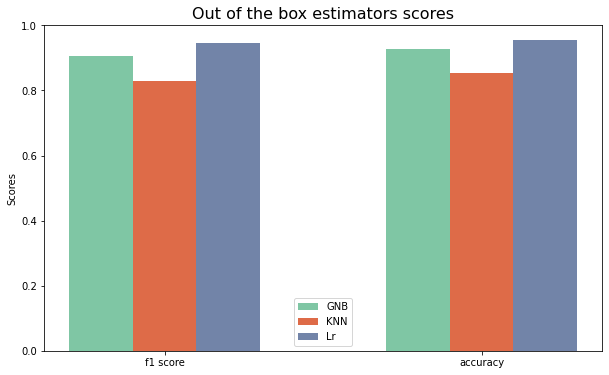

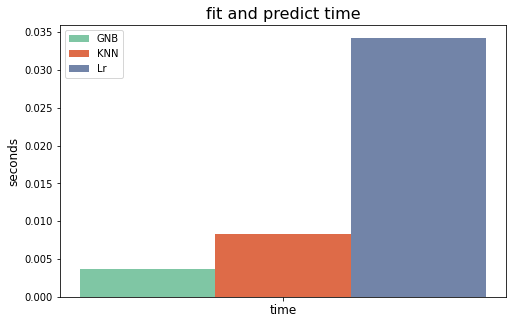

In [ ]:
# scores diagram
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)
x = np.arange(2)
y1 = ootb_performance[0, :2]
y2 = ootb_performance[1, :2]
y3 = ootb_performance[2, :2]
width = 0.2

plt.bar(x-0.2, y1, width, color='#7FC6A4')
plt.bar(x, y2, width, color='#DE6B48')
plt.bar(x+0.2, y3, width, color='#7284A8')
plt.xticks(x, ['f1 score', 'accuracy'])
plt.ylabel("Scores")
plt.legend(["GNB", "KNN", "Lr"])
plt.title("Out of the box estimators scores", size=16)
plt.show()

# time diagram
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
x = np.arange(1)
y1 = ootb_performance[0, 2]
y2 = ootb_performance[1, 2]
y3 = ootb_performance[2, 2]
width = 0.1

plt.bar(x-0.1, y1, width, color='#7FC6A4')
plt.bar(x, y2, width, color='#DE6B48')
plt.bar(x+0.1, y3, width, color='#7284A8')
plt.xticks(x, ['time'], size=12)
plt.ylabel("seconds", size=12)
plt.legend(["GNB", "KNN", "Lr"])
plt.title("fit and predict time", size=16)
plt.show()

**Παρατηρήσεις**<br>
Όσον αφορά τους out of the box ταξινομητές, βλέπουμε από το πρώτο διάγραμμα ότι ο καλύτερος είναι ο logistic regression τόσο σε accuracy όσο και σε f1 score. Ωστόσο, ο lr απαιτεί τον περισσότερο χρόνο για εκπαίδευση στο train set και πρόβλεψη στο test set. Χειρότερος ταξινομητής με default παραμέτρους είναι ο knn, ο οποίος έχει τα χαμηλότερο f1 score και accuracy.  

###Optimal f1 score model's performance:

In [ ]:
optimal_f1_performance = np.array ([[gnb_optimalf1_f1, gnb_optimalf1_acc, gnb_optimalf1_f1 - gnb_ootb_f1, gnb_optimalf1_acc - gnb_ootb_acc, gnb_optimal_f1_time],
                              [knn_optimalf1_f1, knn_optimalf1_acc, knn_optimalf1_f1 - knn_ootb_f1, knn_optimalf1_acc - knn_ootb_acc, knn_optimal_f1_time],
                              [lr_optimalf1_f1, lr_optimalf1_acc, lr_optimalf1_f1 - lr_ootb_f1, lr_optimalf1_acc - lr_ootb_acc, lr_optimal_f1_time]])

display(pd.DataFrame(optimal_f1_performance, index = ['Gaussian Naive Bayes', 'k Nearest Neighbors', 'Logistic Regression'], columns = ['f1 score','Accuracy','f1 improvement','Acc improvement','Time']))

,f1 score,Accuracy,f1 improvement,Acc improvement,Time
Gaussian Naive Bayes,0.934874,0.945455,0.027741,0.018182,0.023425
k Nearest Neighbors,0.927943,0.936364,0.098672,0.081818,0.131338
Logistic Regression,0.934874,0.945455,-0.011138,-0.009091,0.024135


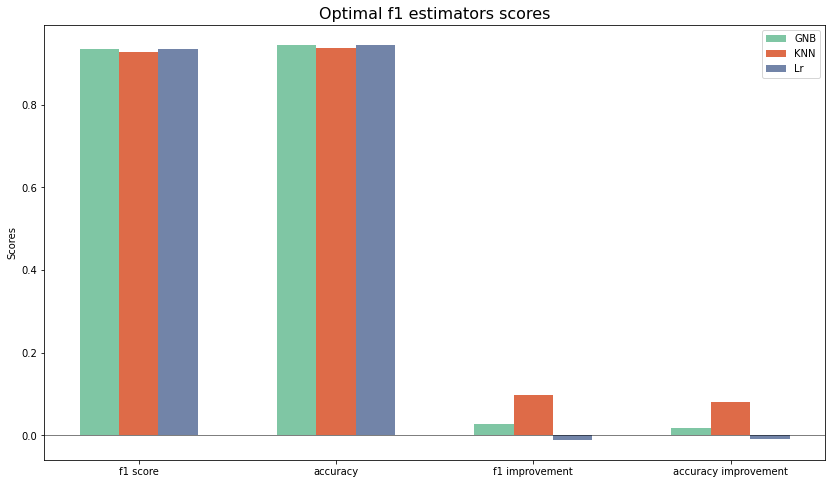

In [ ]:
# optimal-f1 scores
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(8)
x = np.arange(4)
y1 = optimal_f1_performance[0, :4]
y2 = optimal_f1_performance[1, :4]
y3 = optimal_f1_performance[2, :4]
width = 0.2

plt.bar(x-0.2, y1, width, color='#7FC6A4')
plt.bar(x, y2, width, color='#DE6B48')
plt.bar(x+0.2, y3, width, color='#7284A8')
plt.xticks(x, ['f1 score', 'accuracy', 'f1 improvement', 'accuracy improvement'])
plt.ylabel("Scores")
plt.legend(["GNB", "KNN", "Lr"])
plt.title("Optimal f1 estimators scores", size=16)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

**Παρατηρήσεις**<br>
Σύμφωνα με το παραπάνω διάγραμμα, τα καλύτερα f1 score και accuracy τα έχει ο ταξινομητής logistic regression. Αξίζει να σημειωθεί πως ο knn ταξινομητής έχει τη μεγαλύτερη βελτίωση σε σχέση με την out of the box υλοποίησή του, ενώ παράλληλα αρκετή βελτίωση βλέπουμε και στον gnb. Από την άλλη, ο lr βελτιώνεται σχετικά λίγο με την αλλαγή των default παραμέτρων του (είχε από την out of the box υλοποίησή του σχετικά καλή απόδοση). Τέλος, ο knn απαιτεί περισσότερο χρόνο για την εκπαίδευση και τη πρόβλεψη αποτελεσμάτων, ακολουθεί ο gnb, ενώ το λιγότερο χρόνο χρειάζεται ο lr.

###Optimal accuracy model's performance:

In [ ]:
optimal_acc_performance = np.array ([[gnb_optimalacc_f1, gnb_optimalacc_acc, gnb_optimalacc_f1 - gnb_ootb_f1, gnb_optimalacc_acc - gnb_ootb_acc, gnb_optimal_acc_time],
                              [knn_optimalacc_f1, knn_optimalacc_acc, knn_optimalacc_f1 - knn_ootb_f1, knn_optimalacc_acc - knn_ootb_acc, knn_optimal_acc_time],
                              [lr_optimalacc_f1, lr_optimalacc_acc, lr_optimalacc_f1 - lr_ootb_f1, lr_optimalacc_acc - lr_ootb_acc, lr_optimal_acc_time]])

display(pd.DataFrame(optimal_acc_performance, index = ['Gaussian Naive Bayes', 'k Nearest Neighbors', 'Logistic Regression'], columns = ['f1 score','Accuracy','f1 improvement','Acc improvement','Time']))

,f1 score,Accuracy,f1 improvement,Acc improvement,Time
Gaussian Naive Bayes,0.934874,0.945455,0.027741,0.018182,0.007068
k Nearest Neighbors,0.927943,0.936364,0.098672,0.081818,0.113437
Logistic Regression,0.945326,0.954545,-0.000686,0.000000,0.029954


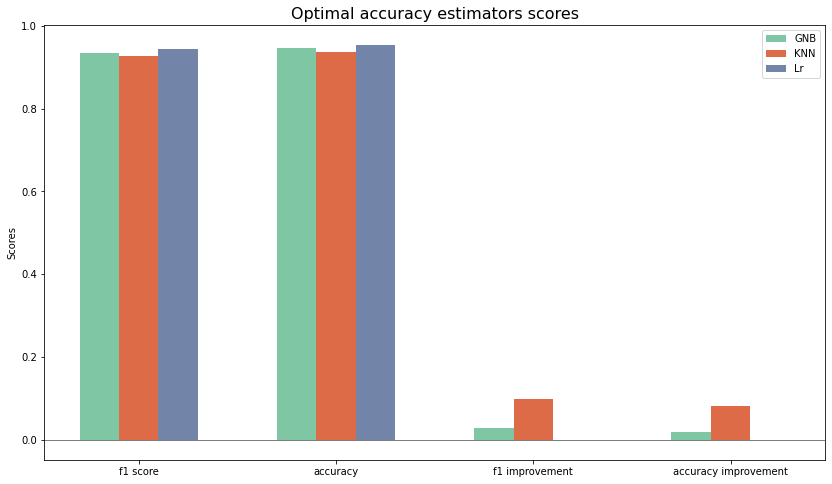

In [ ]:
# optimal-accuracy scores
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(8)
x = np.arange(4)
y1 = optimal_acc_performance[0, :4]
y2 = optimal_acc_performance[1, :4]
y3 = optimal_acc_performance[2, :4]
width = 0.2

plt.bar(x-0.2, y1, width, color='#7FC6A4')
plt.bar(x, y2, width, color='#DE6B48')
plt.bar(x+0.2, y3, width, color='#7284A8')
plt.xticks(x, ['f1 score', 'accuracy', 'f1 improvement', 'accuracy improvement'])
plt.ylabel("Scores")
plt.legend(["GNB", "KNN", "Lr"])
plt.title("Optimal accuracy estimators scores", size=16)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

**Παρατηρήσεις**<br>
Και οι τρεις ταξινομητές βελτιστοποιημένοι ως προς το accuracy έχουν πολύ κοντινές τιμές accuracy και f1 score. Σύμφωνα με το bar plot, καλύτερος σε f1 score είναι ο logistic regression με απειροελάχιστη διαφορά από τον knn, ενώ το υψηλότερο accuracy το έχει ο knn. O ταξινομητής knn έχει τη μεγαλύτερη βελτίωση σε σχέση με την out of the box υλοποίησή του, ενώ παράλληλα αρκετή βελτίωση βλέπουμε και στον gnb. Από την άλλη, ο lr δε βελτιώνεται καθόλου με την αλλαγή των default παραμέτρων του, αντιθέτως φαίνεται να πέφτει λίγο η επίδοσή του. Τέλος, ο knn απαιτεί περισσότερο χρόνο για την εκπαίδευση και τη πρόβλεψη αποτελεσμάτων, ακολουθεί ο gnb, ενώ το λιγότερο χρόνο χρειάζεται ο lr.

###Worst Classifier: Out-of-the-box knn

Παρακάτω παρουσιάζεται το confusion matrix του "χειρότερου",σύμφωνα με τις δύο μετρικές, ταξινομητή. Όπως φαίνεται αυτός είναι ο Out-of-the-box kΝΝ. 

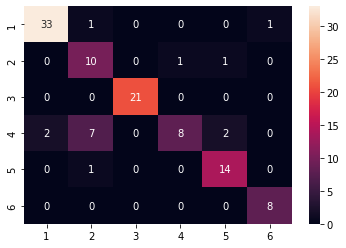

In [ ]:
worst_cm = confusion_matrix(y_test, knn_ootb_preds)
df_cm = pd.DataFrame(worst_cm, np.arange(6)+1, np.arange(6)+1)
sn.heatmap(df_cm, annot=True)

**Παρατηρήσεις**<br>
Αρχίκα, ένας ταξινομητής έχει καλή απόδοση με βάση το confusion matrix, εφόσον όλα τα στοιχεία του βρίσκονται στην διαγώνιο.
Από την παραπάνω εικόνα παρατηρούμε ότι ο συγκεκριμένος ταξινομητής τείνει να κάνει misclassify την κλάση 4 (pityriasis rosea). Αυτό συμαίνει ότι, αντί να τοποθετήσει τα δεδομένα στην συγκεκρίμενη κλάση, τα τοποθετεί σε κάποια άλλη (στην προκειμένη περίπτωση στην 2, seboreic dermatitis). Έτσι, μπόρουμε να καταλάβουμε σε ποιο σημείο μπορούμε να εστιάσουμε, για να τον βελτιώσουμε και πως προκύπτουν οι χαμηλότερες τιμές στις μετρικές μας. 

###Best Classifier: Optimal Logistic Regression

Παρακάτω παρουσιάζεται το confusion matrix του "καλύτερου",σύμφωνα με τις δύο μετρικές, ταξινομητή. Όπως φαίνεται αυτός είναι ο Optimal Logistic Regression. 

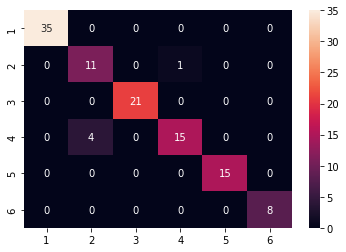

In [ ]:
best_cm = confusion_matrix(y_test, lr_preds_acc)
df_cm = pd.DataFrame(best_cm, np.arange(6)+1, np.arange(6)+1)
sn.heatmap(df_cm, annot=True)

**Παρατηρήσεις**<br>
Αντίστοιχα, βλέπουμε ότι ο συγκεκριμένος ταξινομητής έχει τα περισσότερα στοιχεία του στην διαγώνιο, επιβεβαιώνοντας τις υψηλές τιμές που έχουν οι μετρικές του. Παρατηρείται ότι πάλι στην κλάση 4 (pityriasis rosea) κάνει misclassify, αλλά στη προκειμένη περίπτωση είναι μικρότερο.